# <font color='red'><b>Bootstrap assignment</b> </font>

<b>There will be some functions that start with the word "grader" ex: grader_sampples(), grader_30().. etc, you should not change those function definition.

Every Grader function has to return True.</b>

<font color='blue'> <b>Importing packages</b> </font>

In [1]:
import numpy as np # importing numpy for numerical computation
from sklearn.datasets import load_boston # here we are using sklearn's boston dataset
from sklearn.metrics import mean_squared_error # importing mean_squared_error metric
from sklearn.tree import DecisionTreeRegressor

import numpy
from pandas import read_csv
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import statistics

In [23]:
boston = load_boston()
x=boston.data #independent variables
y=boston.target #target variable

In [24]:
x.shape

(506, 13)

## <font color='red'><b>Task 1</b></font>

<font color='red'> <b>Step - 1</b></font>

*  <font color='blue'><b>Creating samples</b></font><br>
    <b> Randomly create 30 samples from the whole boston data points</b>
    *  Creating each sample: Consider any random 303(60% of 506) data points from whole data set and then replicate any 203 points from the sampled points
    
     For better understanding of this procedure lets check this examples, assume we have 10 data points [1,2,3,4,5,6,7,8,9,10], first we take 6 data points randomly , consider we have selected [4, 5, 7, 8, 9, 3] now we will replicate 4 points from [4, 5, 7, 8, 9, 3], consder they are [5, 8, 3,7] so our final sample will be [4, 5, 7, 8, 9, 3, 5, 8, 3,7]
* <font color='blue'><b> Create 30 samples </b></font>
    *  Note that as a part of the Bagging when you are taking the random samples <b>make sure each of the sample will have different set of columns</b><br>
Ex: Assume we have 10 columns[1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10] for the first sample we will select [3, 4, 5, 9, 1, 2] and for the second sample  [7, 9, 1, 4, 5, 6, 2] and so on...
Make sure each sample will have atleast 3 feautres/columns/attributes

<font color='red'><b>Step - 2 </b></font>

<font color='blue'><b>Building High Variance Models on each of the sample and finding train MSE value</b></font>

*  Build a regression trees on each of 30 samples.
*  Computed the predicted values of each data point(506 data points) in your corpus.
*  Predicted house price of $i^{th}$ data point $y^{i}_{pred} =  \frac{1}{30}\sum_{k=1}^{30}(\text{predicted value of } x^{i} \text{ with } k^{th} \text{ model})$
*  Now calculate the $MSE =  \frac{1}{506}\sum_{i=1}^{506}(y^{i} - y^{i}_{pred})^{2}$

<font color='red'> <b>Step - 3 </b></font>

*  <font color='blue'><b>Calculating the OOB score </b></font>

*  Predicted house price of $i^{th}$ data point $y^{i}_{pred} =  \frac{1}{k}\sum_{\text{k= model which was buit on samples not included } x^{i}}(\text{predicted value of } x^{i} \text{ with } k^{th} \text{ model})$.
*  Now calculate the $OOB Score =  \frac{1}{506}\sum_{i=1}^{506}(y^{i} - y^{i}_{pred})^{2}$.

# <font color='red'><b>Task 2</b></font>

*  <font color='blue'><b>Computing CI of OOB Score and Train MSE</b></font>
  *   Repeat Task 1 for 35 times, and for each iteration store the Train MSE and OOB score </li>
<li> After this we will have 35 Train MSE values and 35 OOB scores </li>
<li> using these 35 values (assume like a sample) find the confidence intravels of MSE and OOB Score </li>
<li> you need to report CI of MSE and CI of OOB Score </li>
<li> Note: Refer the Central_Limit_theorem.ipynb to check how to find the confidence intravel</li>
</ol>

# <font color='red'><b>Task 3</b></font>

*  <font color='blue'><b>Given a single query point predict the price of house.</b></font>

Consider xq= [0.18,20.0,5.00,0.0,0.421,5.60,72.2,7.95,7.0,30.0,19.1,372.13,18.60] 
Predict the house price for this point as mentioned in the step 2 of Task 1.

# <font color='blue'> <b>Task - 1</b></font>

<font color='blue'><b>Step - 1</b></font>

*  <font color='blue'> <b>Creating samples</b></font>

<font color='Orange'><b>Algorithm</b></font>

![alt text](https://i.imgur.com/BTVYXQ1.jpg/)

*  <font color='blue'><b> Write code for generating samples</b></font>

In [5]:
from random import sample 
def generating_samples(input_data, target_data):
  indices = [i for i in range(input_data.shape[0])]
  selecting_row= sample(indices,303)
  replicating_row= sample(selecting_row,203)
  tot_indices = selecting_row + replicating_row

  selecting_row = np.array(selecting_row)
  replicating_row = np.array(replicating_row)


  found = 0
  while found != 1:
    random_num=random.randint(1,input_data.shape[1])
    if random_num >3 :
      found = 1
    
  selecting_column = np.random.choice(input_data.shape[1], random_num, replace=False)

  sample_data = input_data[selecting_row[:, None],np.array(selecting_column)]

  target_of_sample_data = target_data[selecting_row]

  #replicating_data
  replicated_sample_data = input_data[replicating_row[:, None],np.array(selecting_column)]
  target_of_replicated_sample_data = target_data[replicating_row]

  #concatinating data

  final_sample_data = np.concatenate((sample_data, replicated_sample_data), axis=0)
  final_target_data = np.concatenate((target_of_sample_data, target_of_replicated_sample_data), axis=0)


  return final_sample_data, final_target_data ,selecting_row ,selecting_column , tot_indices



<font color='cyan'> <b> Grader function - 1 </b> </fongt>

In [6]:
import random
def grader_samples(a,b,c,d):
    length = (len(a)==506  and len(b)==506)
    sampled = (len(a)-len(set([str(i) for i in a]))==203)
    rows_length = (len(c)==303)
    column_length= (len(d)>=3)
    assert(length and sampled and rows_length and column_length)
    return True
a,b,c,d,_ = generating_samples(x, y)
grader_samples(a,b,c,d)

True

*  <font color='blue'> <b>Create 30 samples </b>

![alt text](https://i.imgur.com/p8eZaWL.jpg)

In [8]:
# Use generating_samples function to create 30 samples 
# store these created samples in a list
list_input_data =[]
list_output_data =[]
list_selected_row= []
list_selected_columns=[]
list_tot_indices = []

for i in range(30):
  a,b,c,d,e = generating_samples(x, y)
  list_input_data.append(a)
  list_output_data.append(b)
  list_selected_row.append(c)
  list_selected_columns.append(d)
  list_tot_indices.append(e)




<font color='cyan'> <b>Grader function - 2 </b></font>

In [9]:
def grader_30(a):
    assert(len(a)==30 and len(a[0])==506)
    return True
grader_30(list_input_data)

True

<font color='red'><b>Step - 2 </b></font>

<font color='orange'><b>Flowchart for building tree</b></font>

![alt text](https://i.imgur.com/pcXfSmp.png)

*  <font color='blue'><b> Write code for building regression trees</b></font>

In [10]:
models = []
for i in range(len(list_input_data)):
  models.append(f'model_{i}')

list_of_all_model = []
for i in range(len(list_input_data)):
  models[i] = DecisionTreeRegressor()
  models[i].fit(list_input_data[i],list_output_data[i])

  list_of_all_model.append(models[i])


In [11]:
print(len(list_of_all_model))

30


<font color='orange'><b>Flowchart for calculating MSE </b></font>

![alt text](https://i.imgur.com/sPEE618.png)

After getting predicted_y for each data point, we can use sklearns mean_squared_error to calculate the MSE between predicted_y and actual_y.

*  <font color='blue'><b> Write code for calculating MSE</b></font>

In [12]:
pred_list = []
for i in range(x.shape[0]):
  sum = 0
  for j in range(len(list_input_data)):
    sum  = sum + list_of_all_model[j].predict(x[i,list_selected_columns[j]].reshape(1, -1))
  avg_pred = sum/len(list_input_data)
  pred_list.extend(avg_pred)


In [13]:
error = 0
for i in range(x.shape[0]):
  error =error + pow((y[i]-pred_list[i]),2)
MSE = error/x.shape[0]
print(MSE)


1.97991391214073


<font color='blue'><b>Step - 3 </b></font>

<font color='orange'><b>Flowchart for calculating OOB score</b></font>

![alt text](https://i.imgur.com/95S5Mtm.png)

Now calculate the $OOB Score =  \frac{1}{506}\sum_{i=1}^{506}(y^{i} - y^{i}_{pred})^{2}$.

*  <font color='blue'><b> Write code for calculating OOB score </b></font>

In [14]:
pred_list = []
for i in range(x.shape[0]):
  sum = 0
  count = 0
  for j in range(len(list_input_data)):
    if i not in list_tot_indices[j]:
      sum  = sum + list_of_all_model[j].predict(x[i,list_selected_columns[j]].reshape(1, -1))
      count += 1
  avg_pred = sum/count
  pred_list.extend(avg_pred)

In [15]:
error = 0
for i in range(x.shape[0]):
  error =error + pow((y[i]-pred_list[i]),2)
OOB_score = error/x.shape[0]
print(OOB_score)

12.41180927547486


##Observation


1.   MSE value is found to be 2.47 which means on an average the square error between the 'y_actual' and 'y_predicted' for any datapoints is 2.47 for running all datapoints for  epoach. As we know for model ,if MSE value 0 then it is found to be the best model . MSE does not have any range, so far the value can go, we do not know but if the value is close to zero ,then we can somehow can say how model is performing.
2.    OOB value is found to be 15.24 which means on an average the square error between the 'y_actual' and 'y_predicted' for any datapoints for model which was buit on samples not included xi is 15.24 for running all datapoints for  epoach.



# <font color='blue'><b>Task 2</b></font>

In [16]:
list_MSE = []
list_OOB = []
for i in range(35):

  
  list_input_data =[]
  list_output_data =[]
  list_selected_row= []
  list_selected_columns=[]
  list_tot_indices = []

  for i in range(30):
    a,b,c,d,e = generating_samples(x, y)
    list_input_data.append(a)
    list_output_data.append(b)
    list_selected_row.append(c)
    list_selected_columns.append(d)
    list_tot_indices.append(e)


  models = []
  for i in range(len(list_input_data)):
    models.append(f'model_{i}')

  list_of_all_model = []
  for i in range(len(list_input_data)):
    models[i] = DecisionTreeRegressor()
    models[i].fit(list_input_data[i],list_output_data[i])
    list_of_all_model.append(models[i])



  pred_list = []
  for i in range(x.shape[0]):
    sum = 0
    for j in range(len(list_input_data)):
      sum  = sum + list_of_all_model[j].predict(x[i,list_selected_columns[j]].reshape(1, -1))
    avg_pred = sum/len(list_input_data)
    pred_list.extend(avg_pred)

  error = 0
  for i in range(x.shape[0]):
    error =error + pow((y[i]-pred_list[i]),2)
  MSE = error/x.shape[0]

  list_MSE.append(MSE)

  pred_list = []
  for i in range(x.shape[0]):
    sum = 0
    count = 0
    for j in range(len(list_input_data)):
      if i not in list_tot_indices[j]:
        sum  = sum + list_of_all_model[j].predict(x[i,list_selected_columns[j]].reshape(1, -1))
        count += 1
    avg_pred = sum/count
    pred_list.extend(avg_pred)

  error = 0
  for i in range(x.shape[0]):
    error =error + pow((y[i]-pred_list[i]),2)
  OOB_score = error/x.shape[0]

  list_OOB.append(OOB_score)

  


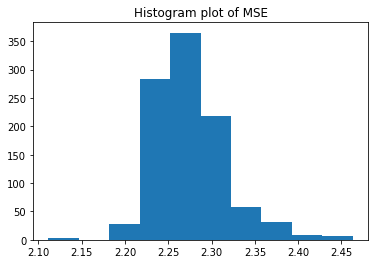

95.0 confidence interval 2.2 and 2.4


In [17]:
#code source -->from Applied AI lecture "Confidence interval using bootstrapping"

x = numpy.array(list_MSE)

# configure bootstrap
n_iterations = 1000
n_size = int(len(x))

# run bootstrap
medians = list()
for i in range(n_iterations):
    # prepare train and test sets
    s = resample(x, n_samples=n_size);
    m = numpy.median(s);
    #print(m)
    medians.append(m)

# plot scores
pyplot.hist(medians)
pyplot.title("Histogram plot of MSE")
pyplot.show()

# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower =  numpy.percentile(medians, p)

p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  numpy.percentile(medians, p)
print('%.1f confidence interval %.1f and %.1f' % (alpha*100, lower, upper))

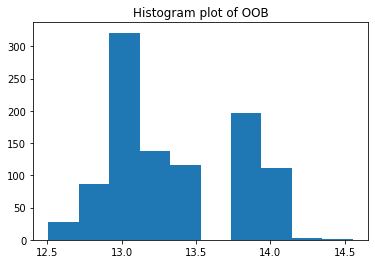

95.0 confidence interval 12.6 and 14.0


In [18]:
#code source -->from Applied AI lecture "Confidence interval using bootstrapping"
x = numpy.array(list_OOB)

# configure bootstrap
n_iterations = 1000
n_size = int(len(x))

# run bootstrap
medians = list()
for i in range(n_iterations):
    # prepare train and test sets
    s = resample(x, n_samples=n_size);
    m = numpy.median(s);
    #print(m)
    medians.append(m)

# plot scores
pyplot.hist(medians)
pyplot.title("Histogram plot of OOB")
pyplot.show()

# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower =  numpy.percentile(medians, p)

p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  numpy.percentile(medians, p)
print('%.1f confidence interval %.1f and %.1f' % (alpha*100, lower, upper))

##Observation

1.   Confidence interval of MSE afer running model for 35 time have range between 2.2 to 2.4 with probabilty of 95%. It means there the 95% chance that the average mean square found to be in the range between 2.2 to 2.4.
2.  Confidence interval of OOB afer running model for 35 time have range between 13.1 to 13.8 with probabilty of 95%. It means there the 95% chance that the average mean square found to be in the range between 13.1 to 13.8.



# <font color='blue'><b>Task 3</b></font>

<font color='orange'><b>Flowchart for Task 3</b></font>

<b>Hint: </b> We created 30 models by using 30 samples in TASK-1. Here, we need send query point "xq"  to 30 models and perform the regression on the output generated by 30 models.

![alt text](https://i.imgur.com/Y5cNhQk.png)

*  <font color='blue'><b> Write code for TASK 3 </b></font>

In [19]:
xq= np.array([0.18,20.0,5.00,0.0,0.421,5.60,72.2,7.95,7.0,30.0,19.1,372.13,18.60])

In [26]:

pred_with_all_model = []
for j in range(len(list_input_data)):
  pred = list_of_all_model[j].predict(xq[list_selected_columns[j]].reshape(1, -1))
  pred_with_all_model.extend(pred)
res = statistics.median(pred_with_all_model)   


print(f'The predicted house price for the given query point using all models is {res}')
 

The predicted house price for the given query point using all models is 18.5


In [28]:
#model which was buit on samples not included xi
pred_with_all_model = []
for j in range(len(list_input_data)):
  if i not in list_tot_indices[j]:
    pred = list_of_all_model[j].predict(xq[list_selected_columns[j]].reshape(1, -1))
    pred_with_all_model.extend(pred)
res = statistics.median(pred_with_all_model)     

print(f'The predicted house price for the given query point using model which was buit on samples not included xq is {res}')
 

The predicted house price for the given query point using model which was buit on samples not included xq is 18.5


##Observation


1. The predicted house price for given query point using both strategy i.e using MSE and OOB method gives the same result which is 18.5
